In [ ]:
!pip install google_play_scraper
!pip install sklearn
!pip install -U gensim
!pip install pyLDAvis
import pandas as pd
import numpy as np
from google_play_scraper.features.reviews import reviews_all, reviews
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel


In [2]:
reviews = reviews_all('com.snorelab.app',sleep_milliseconds=0,lang='en', country='us')

In [3]:
df = pd.DataFrame(reviews)
total_reviews = len(df)
print('Total reviews:', len(reviews))


Total reviews: 4388


In [4]:
df_prep = df[df['score']<5]
df_prep = df_prep[df_prep.content.str.len()>=10]
df_prep = df_prep.reset_index().drop(columns='index')
print('reviews: ', len(df_prep))


reviews:  1505


In [5]:
df_prep['prep'] = df_prep['content'].str.replace("[^a-zA-Z]", " ")
df_prep['prep'] = df_prep['prep'].apply(lambda x: x.lower())
df_prep['prep']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       i was initially pleasantly surprised by the ap...
1       hello  the i had purchased the app on a monthl...
2       i m a targeted individual and the only thing t...
3       not sure if it s helping  but at least helps m...
4       it only record the first hour althought i set ...
                              ...                        
1500                                         needs fixing
1501               triggered wake up property is missing 
1502    have to admit has spurred my into wanting to a...
1503    set up the tracker  went to sleep  and no resu...
1504                this app is fun and very interesting 
Name: prep, Length: 1505, dtype: object

In [6]:
from gensim import corpora
stop_words = set(stopwords.words('english'))
doc_token = df_prep['prep'].apply(lambda x: x.split()) # 토큰화
doc_token = doc_token.apply(lambda x: [item for item in x if item not in stop_words])
print(doc_token)
dictionary = corpora.Dictionary(doc_token)
corpus = [dictionary.doc2bow(text) for text in doc_token]

NUM_TOPICS = 14 #20개의 토픽, k=20

0       [initially, pleasantly, surprised, app, decide...
1       [hello, purchased, app, monthly, rental, inr, ...
2       [targeted, individual, thing, recorded, sounde...
3            [sure, helping, least, helps, track, things]
4       [record, first, hour, althought, set, recordin...
                              ...                        
1500                                      [needs, fixing]
1501                 [triggered, wake, property, missing]
1502    [admit, spurred, wanting, actually, something,...
1503    [set, tracker, went, sleep, results, showed, m...
1504                              [app, fun, interesting]
Name: prep, Length: 1505, dtype: object


In [7]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.027*"app" + 0.018*"version" + 0.014*"recording" + 0.012*"paid" + 0.011*"like" + 0.009*"time"')
(1, '0.032*"app" + 0.014*"night" + 0.014*"time" + 0.011*"version" + 0.011*"free" + 0.010*"sleep"')
(2, '0.049*"app" + 0.023*"snoring" + 0.014*"great" + 0.011*"use" + 0.011*"free" + 0.011*"alarm"')
(3, '0.018*"app" + 0.015*"sleep" + 0.014*"use" + 0.009*"work" + 0.009*"time" + 0.009*"day"')
(4, '0.040*"app" + 0.019*"snoring" + 0.014*"snore" + 0.013*"night" + 0.012*"good" + 0.010*"sleep"')
(5, '0.014*"app" + 0.011*"really" + 0.011*"useful" + 0.011*"option" + 0.011*"interesting" + 0.010*"snoring"')
(6, '0.047*"app" + 0.016*"great" + 0.013*"sleep" + 0.012*"snoring" + 0.012*"work" + 0.011*"use"')
(7, '0.021*"easy" + 0.015*"use" + 0.015*"sleep" + 0.012*"like" + 0.012*"snoring" + 0.012*"would"')
(8, '0.040*"app" + 0.018*"sleep" + 0.014*"free" + 0.013*"snoring" + 0.010*"works" + 0.010*"well"')
(9, '0.025*"app" + 0.024*"snoring" + 0.024*"good" + 0.012*"use" + 0.010*"would" + 0.009*"night"')
(10,

In [9]:
def measure(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_score = []
  model_list = []
  perplexity=[]
  for num_topics in range(start, limit, step):
    
    model = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score.append(coherencemodel.get_coherence())
    perplexity.append(model.log_perplexity(corpus))
  return model_list, coherence_score, perplexity

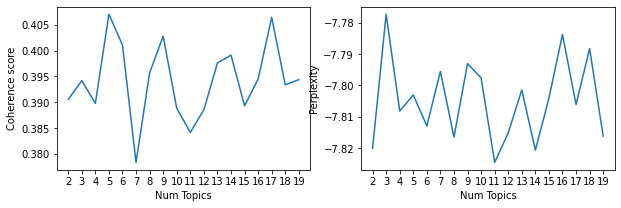

Num Topics = 2  Coherence Value:  0.3905
Num Topics = 3  Coherence Value:  0.3942
Num Topics = 4  Coherence Value:  0.3898
Num Topics = 5  Coherence Value:  0.407
Num Topics = 6  Coherence Value:  0.4011
Num Topics = 7  Coherence Value:  0.3784
Num Topics = 8  Coherence Value:  0.3957
Num Topics = 9  Coherence Value:  0.4028
Num Topics = 10  Coherence Value:  0.3888
Num Topics = 11  Coherence Value:  0.3842
Num Topics = 12  Coherence Value:  0.3885
Num Topics = 13  Coherence Value:  0.3976
Num Topics = 14  Coherence Value:  0.3991
Num Topics = 15  Coherence Value:  0.3893
Num Topics = 16  Coherence Value:  0.3945
Num Topics = 17  Coherence Value:  0.4064
Num Topics = 18  Coherence Value:  0.3934
Num Topics = 19  Coherence Value:  0.3944
Num Topics = 2  Perplexity:  -7.82
Num Topics = 3  Perplexity:  -7.7773
Num Topics = 4  Perplexity:  -7.8081
Num Topics = 5  Perplexity:  -7.803
Num Topics = 6  Perplexity:  -7.8129
Num Topics = 7  Perplexity:  -7.7955
Num Topics = 8  Perplexity:  -7.81

In [10]:
cm = CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
model_list, coherence_score, perplexity= measure(dictionary=dictionary, corpus=corpus, texts=doc_token, start=2, limit=20, step=1)
limit=20; start=2; step=1
x = range(start, limit, step)
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 1))
plt.plot(x, coherence_score)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 1))
plt.plot(x, perplexity)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.show()
for k, cv in zip(x, coherence_score):
  print("Num Topics =", k, " Coherence Value: ", round(cv, 4))
for k, perp in zip(x, perplexity):
  print("Num Topics =", k, " Perplexity: ", round(perp, 4))

In [8]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.049790 -0.002422       1        1  15.612257
2      0.032231 -0.029569       2        1   9.393632
13     0.045381  0.003536       3        1   9.015417
6      0.021817 -0.006593       4        1   8.836339
9      0.038177 -0.022756       5        1   8.490687
8      0.036738 -0.007468       6        1   8.316802
1      0.017971 -0.023436       7        1   8.048604
10     0.033874  0.074616       8        1   7.440998
12     0.012558 -0.021555       9        1   5.823125
0      0.006937  0.045221      10        1   4.935185
11    -0.022830 -0.010716      11        1   4.756459
3     -0.048887  0.012912      12        1   3.901998
7     -0.107458 -0.105367      13        1   2.730048
5     -0.116299  0.093596      14        1   2.698451, topic_info=        Term        Freq       Total Category  logprob  loglift
242     easy   52.000000   52.000000  Default  30.0000  30.0000
217      use  183.000000  183.000000  Default  29.0000  29.0000
38      good  203.000000  203.000000  Default  28.0000  28.0000
213    sleep  189.000000  189.000000  Default  27.0000  27.0000
170     free  171.000000  171.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
82    record    2.296552   99.333047  Topic14  -5.4070  -0.1546
59      well    2.180970   82.418017  Topic14  -5.4586  -0.0195
170     free    2.332224  171.191618  Topic14  -5.3916  -0.6835
588    phone    2.135562  101.492419  Topic14  -5.4797  -0.2488
930  upgrade    2.105270   71.892998  Topic14  -5.4939   0.0818

[1116 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2989     14  0.638738     aber
199       1  0.029315     able
199       2  0.087945     able
199       3  0.117260     able
199       4  0.117260     able
...     ...       ...      ...
1525     12  0.631998  written
607       8  0.584597       xl
2529     13  0.637317       yo
2893     11  0.609707   zquiet
2696      8  0.584597      zte

[2738 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 14, 7, 10, 9, 2, 11, 13, 1, 12, 4, 8, 6])

In [11]:
tunned_model = model_list[12]
model_topics = tunned_model.show_topics(formatted=False)
print(tunned_model.print_topics(num_words=6))

[(0, '0.046*"app" + 0.021*"snoring" + 0.013*"good" + 0.011*"use" + 0.008*"free" + 0.008*"snore"'), (1, '0.020*"version" + 0.016*"good" + 0.016*"recording" + 0.014*"app" + 0.013*"free" + 0.012*"full"'), (2, '0.027*"app" + 0.022*"snoring" + 0.018*"recording" + 0.011*"like" + 0.010*"work" + 0.010*"sleep"'), (3, '0.022*"app" + 0.019*"snoring" + 0.019*"like" + 0.014*"night" + 0.014*"great" + 0.012*"works"'), (4, '0.030*"app" + 0.015*"good" + 0.014*"snoring" + 0.013*"recording" + 0.012*"night" + 0.012*"use"'), (5, '0.017*"app" + 0.016*"sleep" + 0.016*"snoring" + 0.011*"good" + 0.010*"version" + 0.010*"tried"'), (6, '0.054*"app" + 0.020*"snoring" + 0.020*"good" + 0.013*"pay" + 0.010*"like" + 0.009*"night"'), (7, '0.023*"app" + 0.011*"snoring" + 0.011*"recordings" + 0.010*"phone" + 0.010*"record" + 0.010*"use"'), (8, '0.047*"app" + 0.024*"free" + 0.023*"version" + 0.015*"paid" + 0.014*"use" + 0.009*"trial"'), (9, '0.053*"app" + 0.019*"use" + 0.015*"snoring" + 0.014*"sleep" + 0.013*"good" + 0.0

In [12]:
def format_topics_sentences(ldamodel=ldamodel, corpus=corpus, document=doc_token):
    topic_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_df = topic_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    topic_df.columns = ['Topic No.', 'Contribution', 'Topic Keywords']
    contents = pd.Series(document)
    topic_df = pd.concat([topic_df, contents], axis=1)
    return(topic_df)

In [14]:
df_topic_kewords = format_topics_sentences(tunned_model, corpus, doc_token)
contributed_topic = df_topic_kewords.reset_index()
contributed_topic.columns = ['No.', 'Topic No.', 'Contribute', 'Keywords', 'Document']
contributed_topic.head(10)

,No.,Topic No.,Contribute,Keywords,Document
0,0,6.0,0.9773,"app, snoring, good, pay, like, night, would, f...","[initially, pleasantly, surprised, app, decide..."
1,1,9.0,0.9749,"app, use, snoring, sleep, good, time, easy, gr...","[hello, purchased, app, monthly, rental, inr, ..."
2,2,3.0,0.9071,"app, snoring, like, night, great, works, free,...","[targeted, individual, thing, recorded, sounde..."
3,3,13.0,0.8673,"app, snoring, good, free, sleep, great, record...","[sure, helping, least, helps, track, things]"
4,4,1.0,0.9071,"version, good, recording, app, free, full, get...","[record, first, hour, althought, set, recordin..."
5,5,8.0,0.8673,"app, free, version, paid, use, trial, time, li...","[need, know, snorelab, selling, medical, infor..."
6,6,2.0,0.8673,"app, snoring, recording, like, work, sleep, go...","[like, app, says, epic, snore, db]"
7,7,7.0,0.9071,"app, snoring, recordings, phone, record, use, ...","[helpful, track, intensity, snoring, sometimes..."
8,8,2.0,0.4528,"app, snoring, recording, like, work, sleep, go...","[helped, see, much, snore]"
9,9,2.0,0.9680,"app, snoring, recording, like, work, sleep, go...","[trying, see, snoring, pattern, system, sensit..."


In [16]:
contributed_topic.Document[0]

['initially',
 'pleasantly',
 'surprised',
 'app',
 'decided',
 'buy',
 'unfortunately',
 'buying',
 'app',
 'broke',
 'idea',
 'change',
 'settings',
 'recorder',
 'completely',
 'messed',
 'categorizes',
 'really',
 'quiet',
 'snores',
 'epic',
 'ones',
 'never',
 'happened',
 'filtering',
 'snores',
 'data',
 'either',
 'completely',
 'exaggerated',
 'super',
 'high',
 'scores',
 'recordings',
 'sound',
 'quiet',
 'downplayed',
 'clear',
 'snore',
 'detected']